### Titanic 연습

#### 필요한 것들 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # 그래프를 그리기 위해서 import

#### 데이터 로드 및 EDA

In [95]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
female_sur = pd.read_csv("gender_submission.csv")

In [3]:
# train이 잘 불러와졌는지 head로 데이터 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# test가 잘 불러와졌는지 head로 데이터 확인
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# train의 타입 확인
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
#test 타입 확인
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# 일단, train을 먼저 봐보자
# info를 이용해 전체적인 내용 확인

train.info()

# 결과값을 보면 Age, Cabin에 Null값이 있는 것을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# describe()를 이용해 전체적인 통계 내용 확인
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
# 변수들의 의미
'''
'PassengerId': 승객 번호 (Index번호로, 의미 없지만 정답을 맞출때 사용 됨)
'Survived' : 생존여부 / 0: 사망 , 1: 생존
'Pclass' : 티켓 class / 1 = 1등석 , 2 = 2등석, 3 = 3등석
'Name' : 이름
'Sex' : 성별
'Age' : 나이
'SibSp' : 타이타닉 호에 승선한 형제자매/배우자 수 (sibling : 형제,자매 / spouse : 남편,아내)
'Parch' : 타이타닉 호에 승선한 부모,자식 수 (parent : 엄마, 아빠 / child : 아들, 딸) 
'Ticket': 티켓 번호
'Fare' : 여객 운임 (고객들이 낸 돈이라고 생각하면 되려나?)
'Cabin' : 객실 번호
'Embarked' : 승선항 (승선 한 항구)

'''


print(len(train[(train.Survived==1)]))
print(len(train))

342
891


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 시각화

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts() 
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

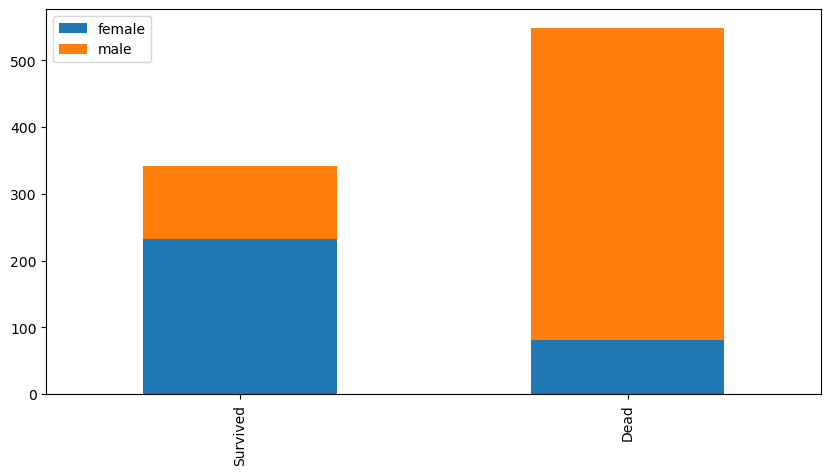

In [31]:
# 성별에 따른 생존여부
bar_chart('Sex')

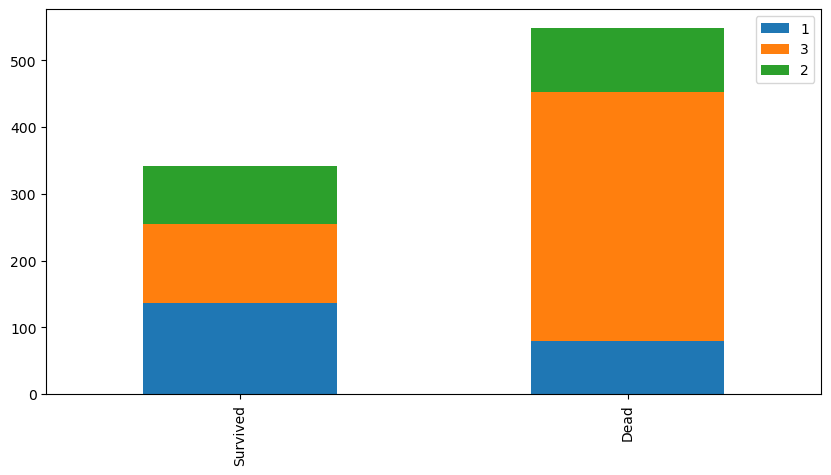

In [32]:
# 1,2,3등석에 따른 생존 여부
# 1등석이 많이 살아남았고, 3등석이 많이 죽은 것을 볼 수 있음
bar_chart("Pclass")

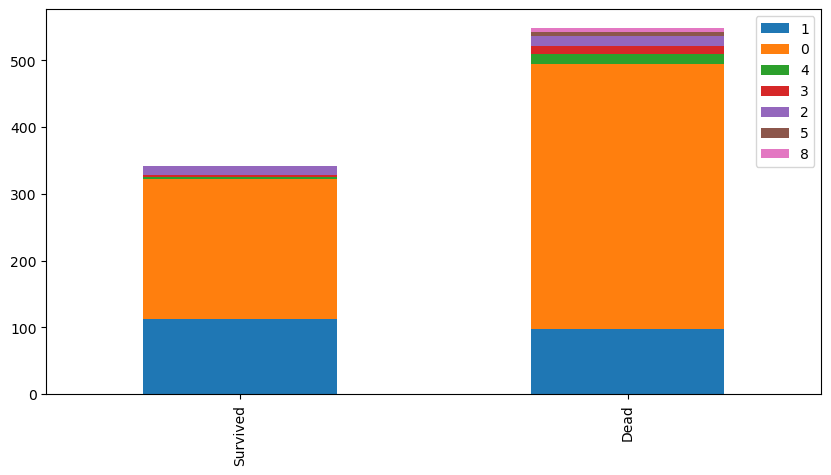

In [33]:
# 0 : 혼자 , 혼자가 죽는 확률이 높다
bar_chart("SibSp")

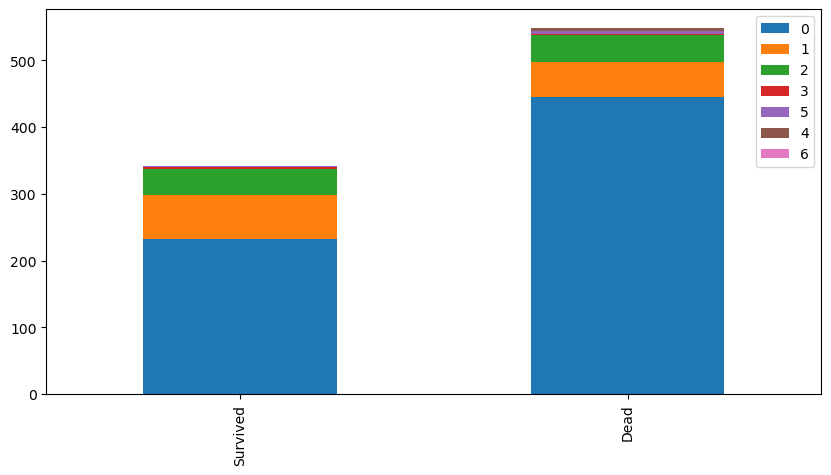

In [14]:
# 0 : 혼자 , 혼자가 죽는 확률이 높다
bar_chart("Parch")

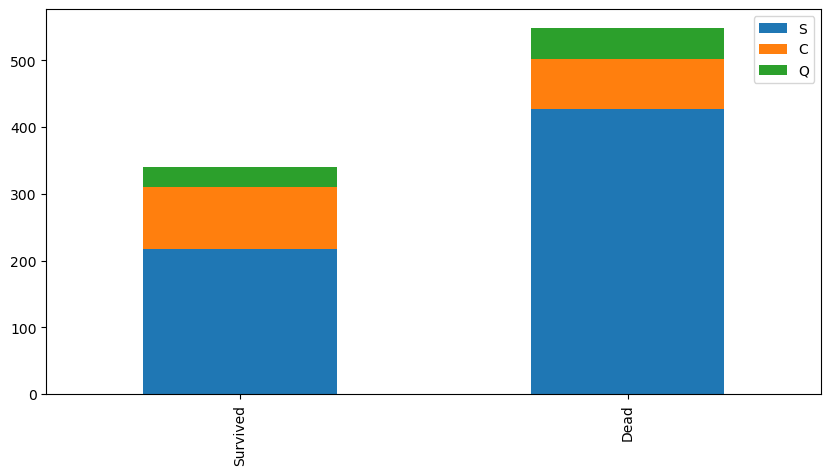

In [15]:
# 어느 선착장에서 탈 때 많이 죽는지.
# 그냥.. 별 의미 없어보인다! 많이 탄곳에서 많이 죽었겠쥐
bar_chart("Embarked")

## 데이터 전처리 (Feature engineering)

#### 이름 변수

In [97]:
#  이름 변수 
# 이름자체는 의미 없겠지만, 앞에 붙은 Mr,Mrs,Miss가 중요할 것이라고 생각함
# 유튜버는 그렇게 생각했는데, 나는 중요하지 않다고 생각했었다. 하지만 듣고보니 맞는 말 같아 유튜버를 따라야겠다

# Mr : 결혼여부 상관없이 남성 성 앞에 사용
# Mrs : 기혼 여성 성 앞에 사용
# Miss : 미혼 여성 성 앞에 사용

# extract의 참고 사이트 https://velog.io/@hhhs101/Pandas-%EC%A0%95%EA%B7%9C%ED%91%9C%ED%98%84%EC%8B%9D-str.extractstr.contains

train_test_data = [train, test] # combining train and test dataset 두개의 데이터를 한번에 변환해줄 수 있음

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [82]:
# title에서 가지고 있는 값들을 확인
# Mr를 0 Mrs를 1 Miss를 2로 만들고 나머지를 3으로 만들어보자.
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [100]:
# 매핑시키고자 하는 값을 따로 정하고..

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

#train과 test를 동시에 바꿔주기
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

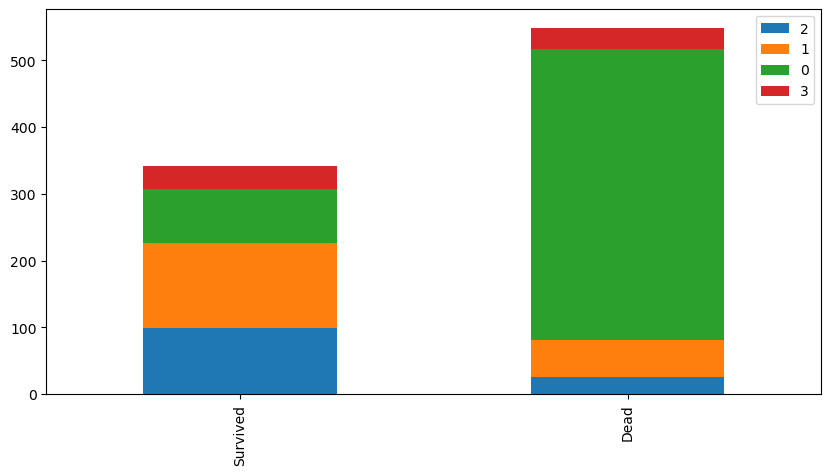

In [34]:
# title에 따른 생존을 봐보자고!
# 0:Mr가 사망비율이 높고, 1:Mrs.가 생존비율이 높다. 2:Miss도 생존비율이 높다.

bar_chart("Title")
# 보기 쉽게 0,1,2,3 으로 볼 수는 없을까? ㅠㅠ



In [101]:
# Title을 뽑아왔으니 이제 Name은 필요 없어서 삭제!
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

#### 성별 변수

In [102]:
# 아까 위에서 봤듯이, 여자가 더많이 살아남은걸 알 수 있다.
# 그러니까 male = 0 female = 1 으로 변경만 해주자

# 매핑시키고자 하는 값을 따로 정하고..

sex_mapping = {"male": 0, "female": 1}

#train과 test를 동시에 바꿔주기
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [103]:
dataset

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,1,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,0,NaN,0,0,359309,8.0500,NaN,S,0


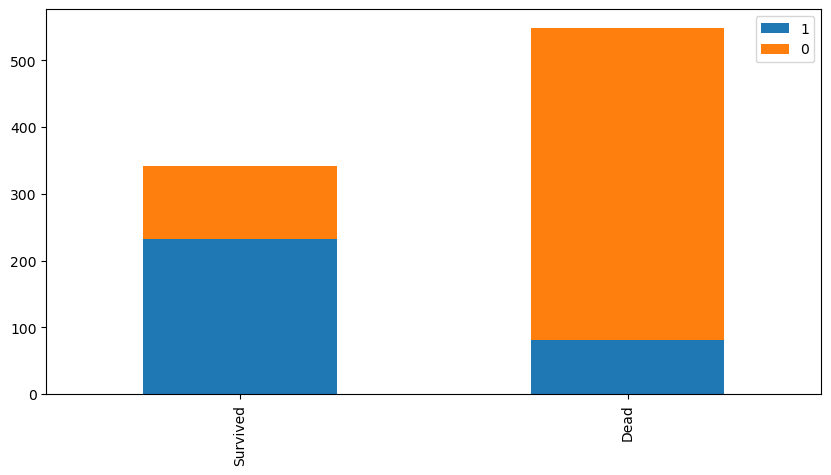

In [41]:
bar_chart('Sex')


#### 나이 변수

In [104]:
train.isnull().sum()
# age에 177개의 결측치가 있다.

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [105]:
# 결측치를 채워주는 방법에는 여러가지가 있다.
# 이 유튜버는 Mr,Mrs,Miss를 확인하고 만약 Mr라면 Mr의 평균연령을 넣어주는 형식으로 진행했다.

# fill missing age with median age for each title (Mr, Mrs, Miss, Others)

#age의 na값을 채워주는데, title별로 age를 평균값 내서 넣어줘라. 라는 뜻임! train 따로 test따로
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True) 
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [106]:
# transform 함수란 무엇인가?! : 함수연속적용_요소별이라고 나와있다. 여러 함수에 적용할 수 있는 메서드 인가보다.
# DataFrame.transform(func, axis=0, args, kwargs) 
# 사이트 : https://wikidocs.net/152703


train.head(30)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

/home/user/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/user/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


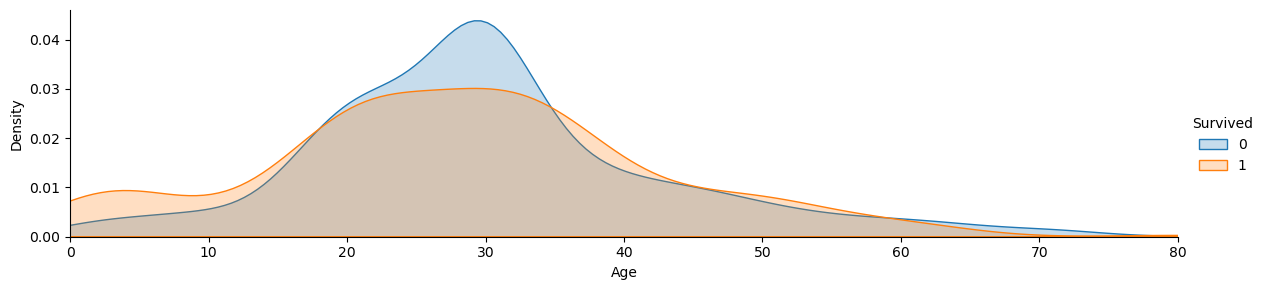

In [49]:
# 전체적으로 그래프를 그려 어떤 나이대가 많이 살았는지 봄

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

/home/user/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/user/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

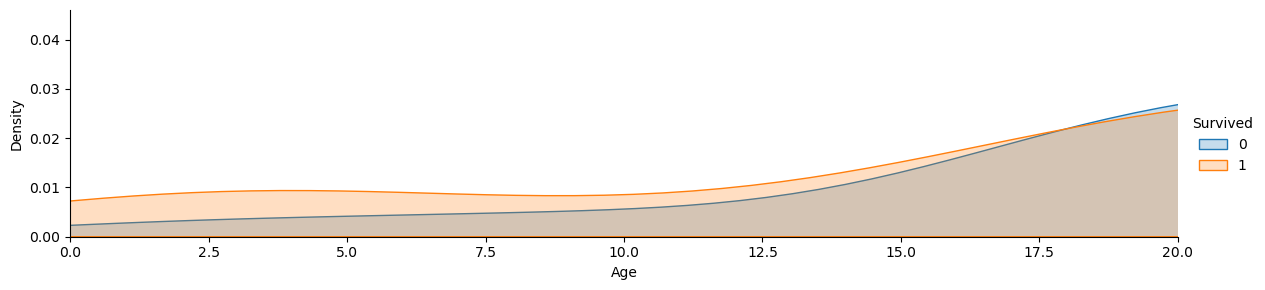

In [50]:
# 그래프를 좀 더 가까이 보기 위해 xlim(0,20)을 통해 0세부터 20세를 확인

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

/home/user/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/user/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(20.0, 30.0)

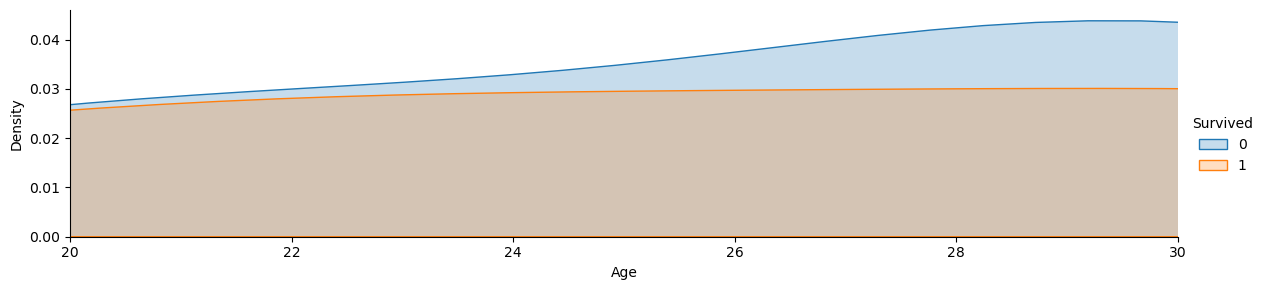

In [51]:
# 20-30세
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

/home/user/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/user/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(30.0, 40.0)

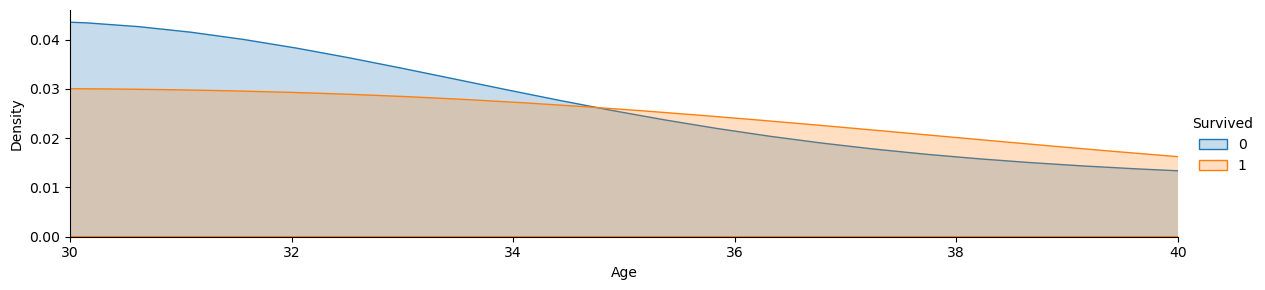

In [52]:
# 30~40세
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

/home/user/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/user/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(40.0, 60.0)

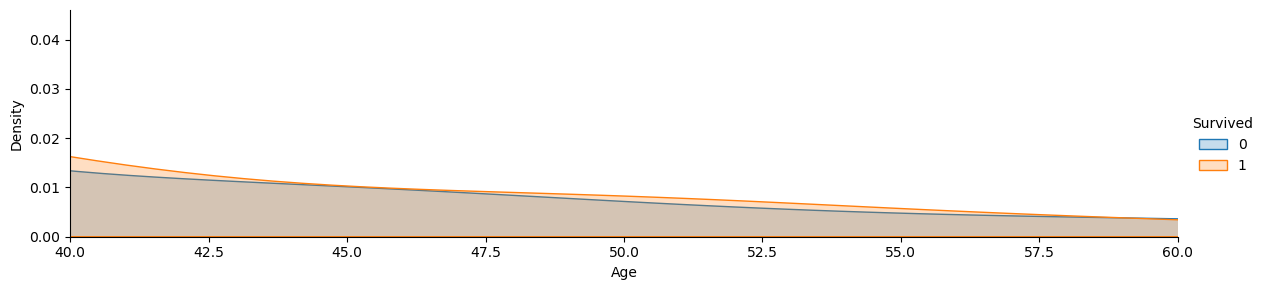

In [53]:
# 40~ 60세
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

/home/user/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/user/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(60.0, 80.0)

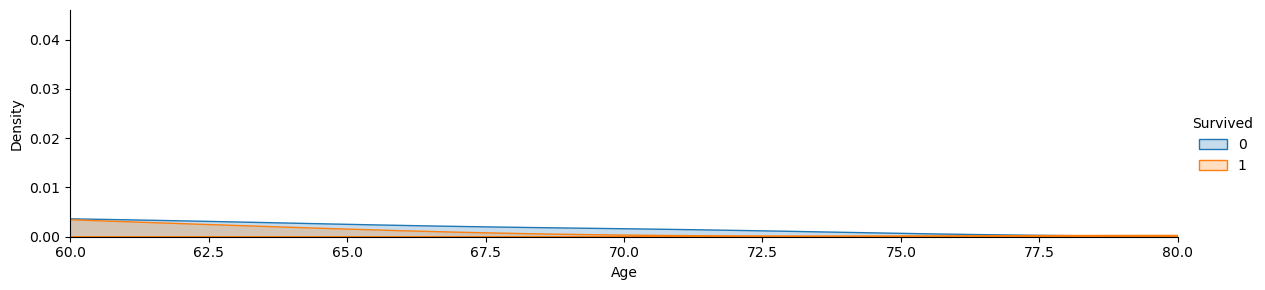

In [54]:
# 60세 이상
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [107]:
# age의 null값이 채워진게 보임
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB



Binning 기술 
시퀀셜한 정보가 있을때는 하나의 카테고리별로 나이를 담는것!
10대 20대 30대 이런느낌 (내가 하고 싶었던 것!!)



child: 0

young: 1

adult: 2

mid-age: 3

senior: 4

In [118]:
# 그래프를 봤을 때 기준점을 16으로 잡은 듯 하다. 16이후로는 차이가 별로 없기 때문에 차이가 확연히 나타나는 16세까지를 child로 지정
# 어차피 훈련시킬때 연령대만 볼 것 같기 때문에 Age 값에 바로 할당해준다.

# 세상에!! 
'''
dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

했을 때 오류나서 확인해보니까 , 를빼니 잘 동작되었다. 왜인진 모름
'''




for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4


In [119]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,1,1.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,1.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,1.0,0,0,111369,30.0000,C148,C,0


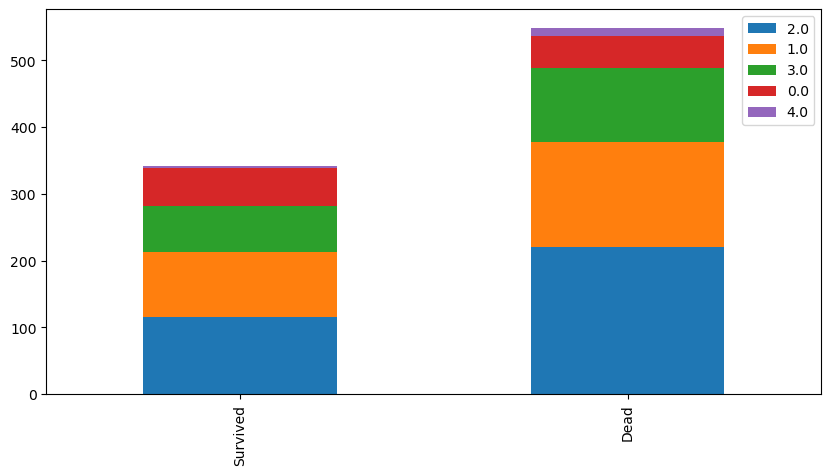

In [120]:
# 2.0 :26세에서 36세 사이가 사망율이 높고, 4.0:62세이상 도 사망율이 높다.
bar_chart('Age')

#### Embarked 변수